# Dataset Exploration using fiftyOne

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
from datasets import npy_to_pcd, create_fo_dataset

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
%load_ext autoreload
%autoreload 2

Convert from npy to pcd for visualization. This also transforms the lidar images based on the azimuth and zenith. One part that is confusing in the beginning is that the two angles are fundamentally different: the azimuth is an angle in the xy plane -> a rotation, while the zenith is an angle between the xy plane and the z axis -> a tilt. That is why a zenith of 90 degrees means that the azimuth becomes irrelevant, while any azimuth preserves the degree of freedom for z as it makes no statement about what is outside of the xy plane. I.e. zenith = 90 degress Is a singularity while no azimuth leads to one. Also zenith should probably be called elevation instead, as zenith = 0 deg and not 90 deg should cause a singularity.

In [3]:
npy_to_pcd()

Found 9999 .npy files. Converting...
Found 9999 .npy files. Converting...
Finished npy to pcd conversion.


As the dataset contains many more cubes than spheres we will split both shapes individually with a 80/20 train/validation split to ensure we do not assign almost all spheres to the validation set, which would risk our model never learning (well) what a sphere looks like.

In [4]:
import fiftyone as fo

dataset_name = "cilp_assessment"
create_fo_dataset(dataset_name = dataset_name, class_fractions=[0.1, 0.1]) # cubes, spheres
dataset = fo.load_dataset(dataset_name)

rgb image dimensions are H:  64  W:  64
 100% |█████████████| 39996/39996 [9.6s elapsed, 0s remaining, 4.1K samples/s]      
Dataset created with 19998 samples and slices ['rgb', 'lidar'] with types .png and .pcd.
Dataset split: 0.8 train, 0.2 validation.


<BarContainer object of 2 artists>

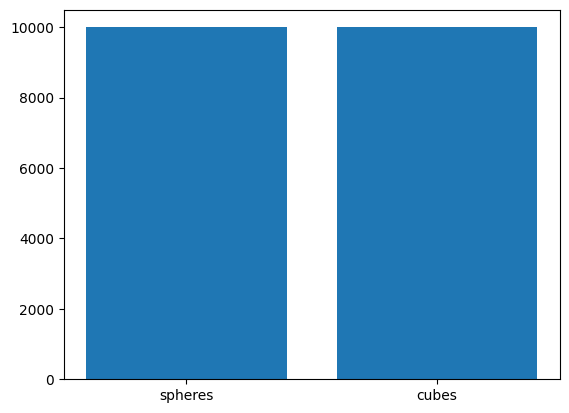

In [5]:
import matplotlib.pyplot as plt
from fiftyone import ViewField as F

cubes_samples =     len(dataset.match(F("ground_truth.label") == "cubes"))
spheres_samples =   len(dataset.match(F("ground_truth.label") == "spheres"))

plt.bar(["spheres", "cubes"], [spheres_samples, cubes_samples])


In [6]:
fo.launch_app(dataset)

Dataset:         cilp_assessment
Media type:      group
Num groups:      19998
Selected groups: 0
Selected labels: 0
Session URL:     http://localhost:5151/

From the fiftyone visualization we can infer some characteristics aboout the dataset:
- the classes are unbalanced, for spheres there a much fewer rgb images
- in the rgb images the position of both the cubes and spheres vary
- the background is fully black in all images

Potential data quality issues we should stay aware of include
- low resolution of rgb images leading to blurriness. Although for most samples an edge of a cube seems seperatable from the shape of a sphere.
- Possibly less understanding of sphere features because of the unbalanced dataset

In [ ]:
"""import glob
import numpy as np
import os
npy_folder = f"../data/assessment/cubes/lidar_npy"

npy_files = glob.glob(os.path.join(npy_folder, "*.npy"))
samples = []

print(f"Found {len(npy_files)} .npy files. Converting...")

for npy_path in npy_files:
    points = np.load(npy_path)
    print(len(points), len(points[0]))"""

'import glob\nimport numpy as np\nimport os\nnpy_folder = f"../data/assessment/cubes/lidar_npy"\n\nnpy_files = glob.glob(os.path.join(npy_folder, "*.npy"))\nsamples = []\n\nprint(f"Found {len(npy_files)} .npy files. Converting...")\n\nfor npy_path in npy_files:\n    points = np.load(npy_path)\n    print(len(points), len(points[0]))'